In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# **Image Load and Preprocessing**

In [2]:
# Define the paths
train_dir = 'dataset_70-20-10/train'
val_dir = 'dataset_70-20-10/val'
test_dir = 'dataset_70-20-10/test'

# Image data generator for training
train_datagen = ImageDataGenerator(rescale=1./224)
val_datagen = ImageDataGenerator(rescale=1./224)
test_datagen = ImageDataGenerator(rescale=1./224)

# Load images from the directories
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='binary'
)

Found 4480 images belonging to 2 classes.
Found 2560 images belonging to 2 classes.
Found 1280 images belonging to 2 classes.


# **Model Setup**

In [3]:
# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Model Training**

In [4]:
# Compile the model
base_learning_rate = 0.001
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,535,649 (36.38 MB)

 Trainable params: 9,535,649 (36.38 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
initial_epochs = 10
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=val_data)

Epoch 1/10


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6141 - loss: 0.6595 - val_accuracy: 0.6988 - val_loss: 0.6067
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8342 - loss: 0.4039 - val_accuracy: 0.6957 - val_loss: 0.6129
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8541 - loss: 0.3484 - val_accuracy: 0.7742 - val_loss: 0.5034
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.8808 - loss: 0.2872 - val_accuracy: 0.8086 - val_loss: 0.4506
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9124 - loss: 0.2182 - val_accuracy: 0.8316 - val_loss: 0.4647
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9253 - loss: 0.1887 - val_accuracy: 0.8398 - val_loss: 0.4251
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9384 - loss: 0.1612 - val_accuracy: 0.8711 - val_loss: 0.3332
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9486 - loss: 0.1305 - val_accuracy: 0.8582 - val_loss: 0.4052
Epo

In [6]:
loss, accuracy = model.evaluate(test_data)
print('Test accuracy :', accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - accuracy: 0.7943 - loss: 0.6653
Test accuracy : 0.782031238079071


# **Evaluation Metrics**

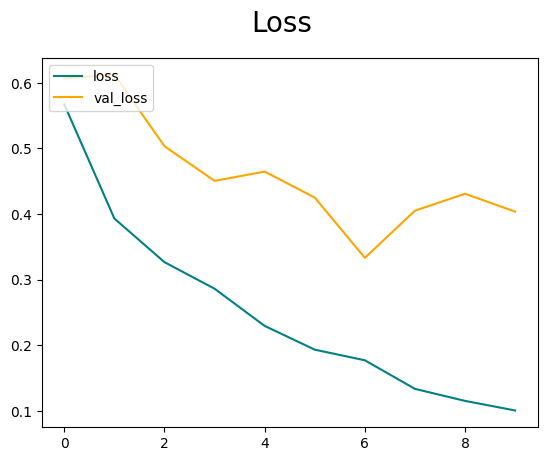

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(initial_epochs)

fig = plt.figure()
plt.plot(epochs_range, loss, color='teal', label='loss')
plt.plot(epochs_range, val_loss, color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

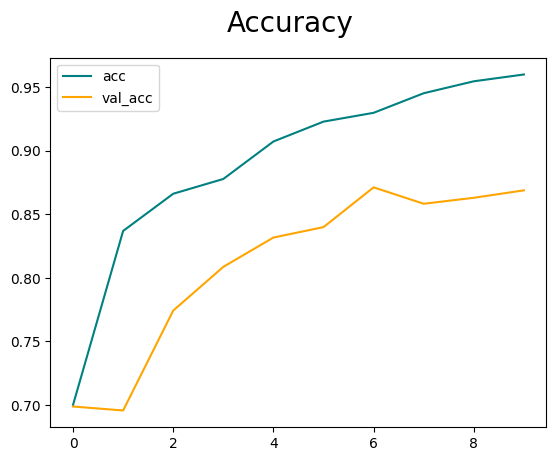

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig = plt.figure()
plt.plot(epochs_range, acc, color='teal', label='acc')
plt.plot(epochs_range, val_acc, color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Test accuracy: 78.20%
Precision: 0.8182
Recall: 0.9000
F1 Score: 0.8571


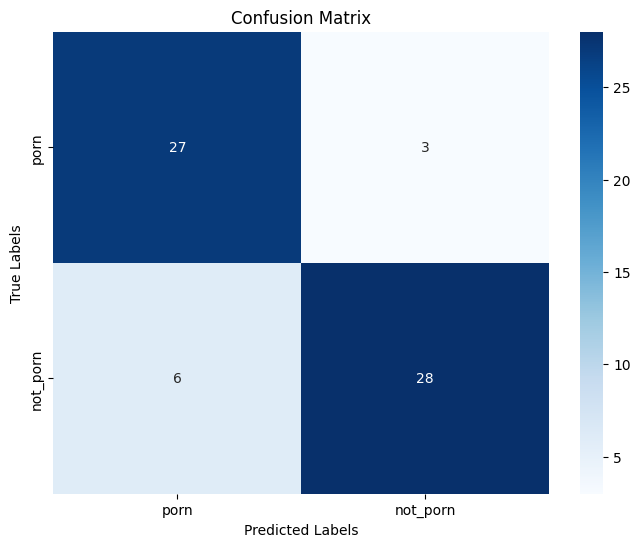

In [9]:
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)

# Function to decode predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'not_porn' for pred in preds]
decoded_predictions = decode_predictions(predictions.flatten())  # Ensure predictions are flattened if necessary
decoded_labels = ['porn' if label == 1 else 'not_porn' for label in test_labels]

# Test scores
precision = precision_score(decoded_labels, decoded_predictions, pos_label='porn')
recall = recall_score(decoded_labels, decoded_predictions, pos_label='porn')
f1 = f1_score(decoded_labels, decoded_predictions, pos_label='porn')
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(decoded_labels, decoded_predictions, labels=['porn', 'not_porn'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['porn', 'not_porn'], yticklabels=['porn', 'not_porn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Test Prediction**

In [10]:
# correct_predictions = np.sum([(pred == 'porn' and label == 1) or (pred == 'not_porn' and label == 0) for pred, label in zip(decoded_predictions, test_labels)])

# plt.figure(figsize=(25, 20))
# for i in range(len(test_images)):
#     plt.subplot(10, 10, i + 1)
#     plt.imshow(test_images[i])
#     score = predictions.flatten()[i]  # Get the prediction score for the current image
#     pred_label = decoded_predictions[i]
#     actual_label = 'porn' if test_labels[i] == 1 else 'not_porn'
#     plt.title(f"Pred: {pred_label} ({score:.2f})\nActual: {actual_label}")
#     plt.axis('off')

# # Display the count of correct predictions
# plt.suptitle(f'Correct Predictions: {correct_predictions} out of {len(test_images)}', fontsize=20)
# plt.subplots_adjust(hspace=0.8)
# plt.show()

# **Transfer Learning**

In [11]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), 
                                               include_top = False, 
                                               weights = "imagenet")

In [13]:
base_model.trainable = False

In [14]:
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(1, activation="sigmoid")                                     
                                ])

In [15]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(train_data,
                    epochs=initial_epochs,
                    validation_data=val_data)

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8940 - loss: 0.2885 - val_accuracy: 0.9367 - val_loss: 0.1826
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.9419 - loss: 0.1593 - val_accuracy: 0.9465 - val_loss: 0.1485
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.9431 - loss: 0.1391 - val_accuracy: 0.9484 - val_loss: 0.1372
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9567 - loss: 0.1199 - val_accuracy: 0.9504 - val_loss: 0.1348
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9534 - loss: 0.1115 - val_accuracy: 0.9496 - val_loss: 0.1309
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.9596 - loss: 0.0985 - val_accuracy: 0.9539 - val_loss: 0.1301
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.9622 - loss: 0.0976 - val_accuracy: 0.9531 - val_loss: 0.1294
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.9630 - loss: 0.0957 - val_accuracy: 0.9535 - v

# **Re-Evaluate**

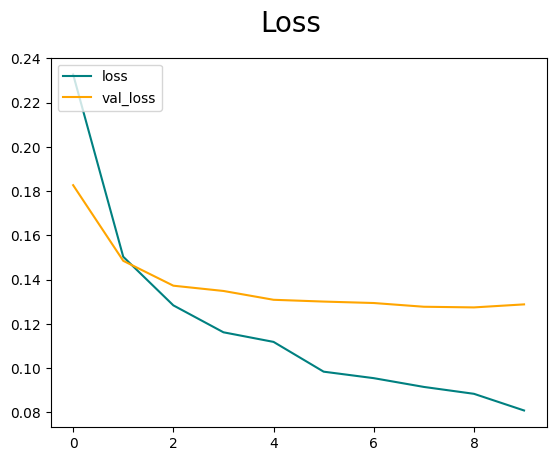

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(initial_epochs)

fig = plt.figure()
plt.plot(epochs_range, loss, color='teal', label='loss')
plt.plot(epochs_range, val_loss, color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

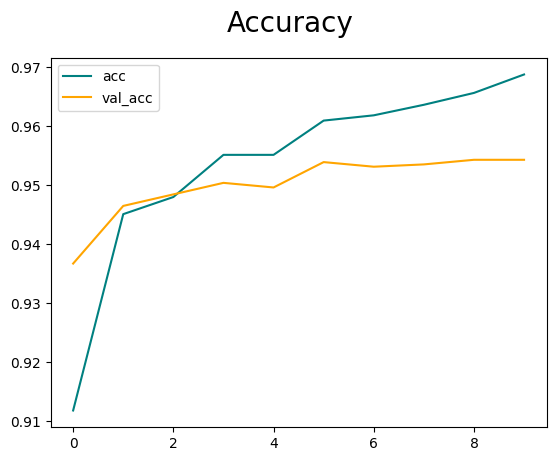

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig = plt.figure()
plt.plot(epochs_range, acc, color='teal', label='acc')
plt.plot(epochs_range, val_acc, color='orange', label='val_acc')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 627ms/step
Test accuracy: 78.20%
Precision: 1.0000
Recall: 0.8710
F1 Score: 0.9310


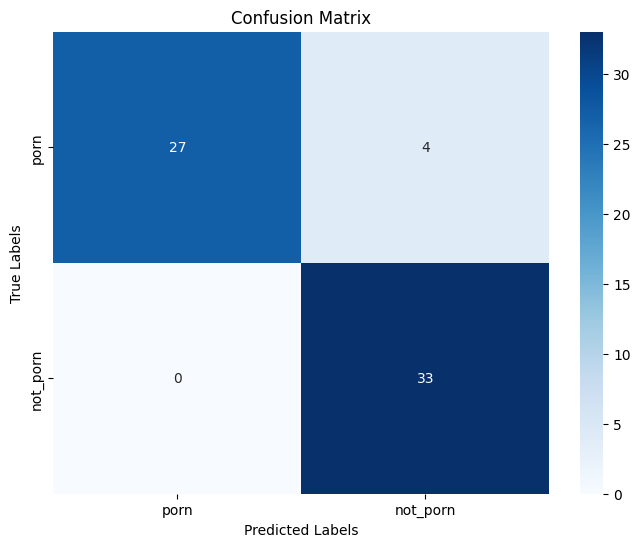

In [22]:
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)

# Function to decode predictions
def decode_predictions(preds, threshold=0.5):
    return ['porn' if pred >= threshold else 'not_porn' for pred in preds]
decoded_predictions = decode_predictions(predictions.flatten())  # Ensure predictions are flattened if necessary
decoded_labels = ['porn' if label == 1 else 'not_porn' for label in test_labels]

# Test scores
precision = precision_score(decoded_labels, decoded_predictions, pos_label='porn')
recall = recall_score(decoded_labels, decoded_predictions, pos_label='porn')
f1 = f1_score(decoded_labels, decoded_predictions, pos_label='porn')
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(decoded_labels, decoded_predictions, labels=['porn', 'not_porn'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['porn', 'not_porn'], yticklabels=['porn', 'not_porn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Re-Test Prediction**

In [24]:
# correct_predictions = np.sum([(pred == 'porn' and label == 1) or (pred == 'not_porn' and label == 0) for pred, label in zip(decoded_predictions, test_labels)])

# plt.figure(figsize=(25, 20))
# for i in range(len(test_images)):
#     plt.subplot(10, 10, i + 1)
#     plt.imshow(test_images[i])
#     score = predictions.flatten()[i]  # Get the prediction score for the current image
#     pred_label = decoded_predictions[i]
#     actual_label = 'porn' if test_labels[i] == 1 else 'not_porn'
#     plt.title(f"Pred: {pred_label} ({score:.2f})\nActual: {actual_label}")
#     plt.axis('off')

# # Display the count of correct predictions
# plt.suptitle(f'Correct Predictions: {correct_predictions} out of {len(test_images)}', fontsize=20)
# plt.subplots_adjust(hspace=0.8)
# plt.show()

# **Save**

In [26]:
model.save('fluxync.keras')